In [20]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

text_data = np.array(['I love Brazil. Brazil!',
                     'Sweden is best',
                     'Germany beats both'])

count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)
bag_of_words.toarray()

count.get_feature_names()

count_2gram = CountVectorizer(ngram_range=(1,2),
                             stop_words="english",
                             vocabulary=['Brazil'])
bag = count_2gram.fit_transform(text_data)

bag.toarray()
count_2gram.vocabulary_

{'Brazil': 0}

In [26]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer() # tf-idf 특성 행렬을 만듭니다.
feature_matrix = tfidf.fit_transform(text_data)
feature_matrix # tf-idf 특성 행렬을 확인
feature_matrix.toarray() # tf-idf 특성 행렬을 밀집 배열로 확인
tfidf.vocabulary_ # 특성 이름을 확인
# tfidf.get_feature_names()

{'love': 6,
 'brazil': 3,
 'sweden': 7,
 'is': 5,
 'best': 1,
 'germany': 4,
 'beats': 0,
 'both': 2}

In [37]:
import pandas as pd



pd.Timestamp('2017-05-01 06:00:00') 
# date_in_london.tz_convert('Africa/Abidjan') # 시간대를 변환
dates = pd.Series(pd.date_range('2/2/2002', periods=3, freq='M')) # 세 개의 날짜를 만듭니다.
dates.dt.tz_localize('Asia/Seoul')

0   2002-02-28 00:00:00+09:00
1   2002-03-31 00:00:00+09:00
2   2002-04-30 00:00:00+09:00
dtype: datetime64[ns, Asia/Seoul]

In [41]:
import pandas as pd
dataframe = pd.DataFrame()
# 두 datetime 특성을 만듭니다.
dataframe['Arrived'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-04-2017')]
dataframe['Left'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-06-2017')]
dataframe['Left'] - dataframe['Arrived'] # 특성 사이의 차이를 계산
pd.Series(delta.days for delta in (dataframe['Left'] - dataframe['Arrived'])) # 특성 간의 기간을 계산

0    0
1    2
dtype: int64

In [42]:
dataframe

,Arrived,Left
0,2017-01-01,2017-01-01
1,2017-01-04,2017-01-06


In [48]:
import pandas as pd
# datetime을 만듭니다.
time_index = pd.date_range("01/01/2010", periods=5, freq="M")
# 데이터프레임을 만들고 인덱스를 설정합니다.
dataframe = pd.DataFrame(index=time_index)
dataframe["Stock_Price"] = [1,2,3,4,5] # 특성을 만듭니다.
dataframe.rolling(window=2).mean() # 이동 평균을 계산
dataframe.ewm(alpha=0.9).mean()

,Stock_Price
2010-01-31,1.000000
2010-02-28,1.909091
2010-03-31,2.891892
2010-04-30,3.889289
2010-05-31,4.888939


In [51]:
import cv2

cv2.__version__

'4.2.0'

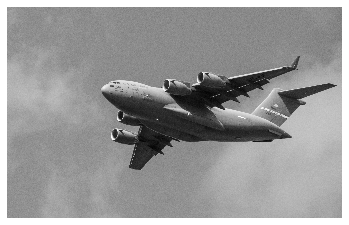

(2270, 3600)

In [57]:
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("./data/images/plane.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
plt.imshow(image, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()
type(image) # 데이터 타입을 확인
image # 이미지 데이터를 확인
image.shape

(<matplotlib.image.AxesImage at 0x7fbf73172da0>, (-0.5, 3599.5, 2269.5, -0.5))

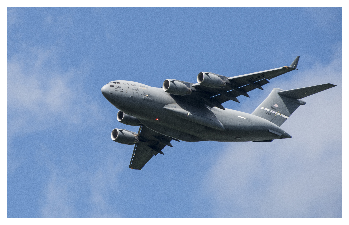

In [61]:
image_bgr = cv2.imread("./data/images/plane.jpg", cv2.IMREAD_COLOR)
image_bgr[0,0]
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis("off") 

(<matplotlib.image.AxesImage at 0x7fbf7302a0b8>, (-0.5, 3599.5, 2269.5, -0.5))

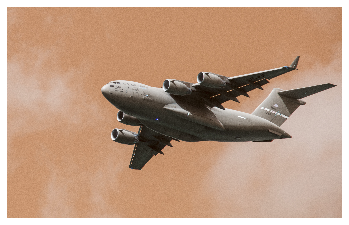

In [62]:
plt.imshow(image_bgr), plt.axis("off") 

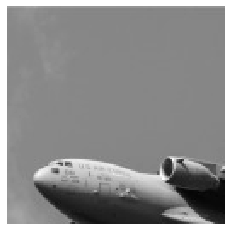

In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("./data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_cropped = image[:128,:128] # 열의 처음 절반과 모든 행을 선택
plt.imshow(image_cropped, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

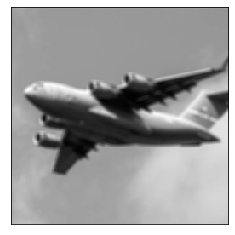

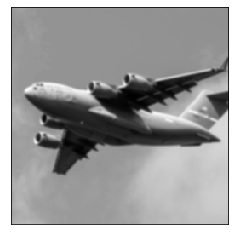

In [71]:
kernel = np.ones((5,5)) / 25.0 # 커널을 만듭니다.
kernel # 커널을 확인
image_kernel = cv2.filter2D(image, -1, kernel) # 커널을 적용
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()
image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) # 가우시안 블러를 적용
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

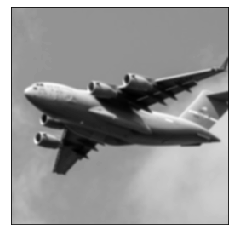

In [72]:
gaus_vector = cv2.getGaussianKernel(5, 0)
gaus_vector
gaus_kernel = np.outer(gaus_vector, gaus_vector) # 벡터를 외적하여 커널을 만듭니다.
gaus_kernel
# filter2D()로 커널을 이미지에 직접 적용하여 비슷한 흐림 효과를 만들 수 있습니다.
image_kernel = cv2.filter2D(image, -1, gaus_kernel) # 커널을 적용
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

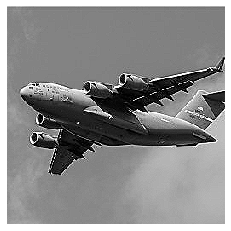

In [80]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("./data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
kernel = np.array([[0, -1, 0],
[-1, 5,-1],
[0, -1, 0]]) # 커널을 만듭니다.
# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(image, -1, kernel)
plt.imshow(image_sharp, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

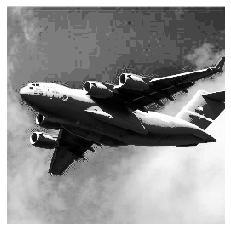

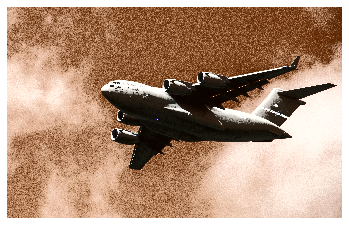

In [82]:
image = cv2.imread("./data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_enhanced = cv2.equalizeHist(image)
plt.imshow(image_enhanced, cmap='gray'), plt.axis("off")
plt.show()

image_bgr = cv2.imread("./data/images/plane.jpg")
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)
plt.imshow(image_rgb), plt.axis('off')
plt.show()

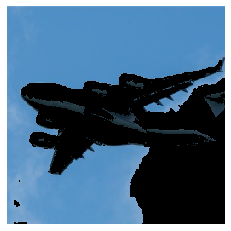

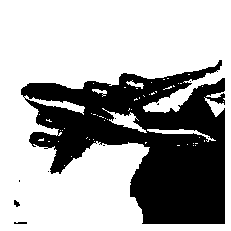

In [86]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_bgr = cv2.imread('./data/images/plane_256x256.jpg') # 이미지 로드
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV) # BGR에서 HSV로 변환
lower_blue = np.array([50,100,50]) # HSV에서 파랑 값의 범위를 정의
upper_blue = np.array([130,255,255])
mask = cv2.inRange(image_hsv, lower_blue, upper_blue) # 마스크를 만듭니다.
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask) # 이미지에 마스크를 적용
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB) # BGR에서 RGB로 변환
plt.imshow(image_rgb), plt.axis("off") # 이미지를 출력
plt.show()
plt.imshow(mask, cmap='gray'), plt.axis("off") # 마스크 출력
plt.show()

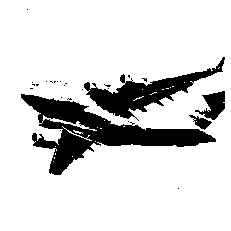

In [87]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_grey = cv2.imread("./data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey, max_output_value,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
neighborhood_size, subtract_from_mean) # 적응적 임계처리를 적용
plt.imshow(image_binarized, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

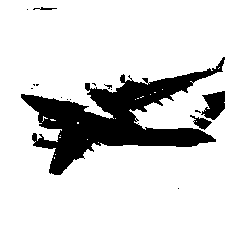

In [88]:
# cv2.ADAPTIVE_THRESH_MEAN_C를 적용합니다.
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
max_output_value,
cv2.ADAPTIVE_THRESH_MEAN_C,
cv2.THRESH_BINARY,
neighborhood_size,
subtract_from_mean)
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

In [89]:
rectangle = (0, 56, 256, 150) # 사각형 좌표: 시작점의 x, 시작점의 y, 너비, 높이
mask = np.zeros(image_rgb.shape[:2], np.uint8) # 초기 마스크를 만듭니다.
bgdModel = np.zeros((1, 65), np.float64) # grabCut에 사용할 임시 배열을 만듭니다.
fgdModel = np.zeros((1, 65), np.float64)

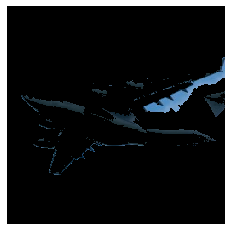

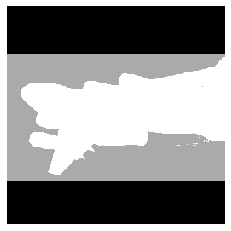

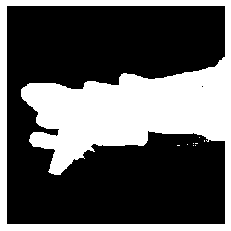

In [90]:
# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
mask, # 마스크
rectangle, # 사각형
bgdModel, # 배경을 위한 임시 배열
fgdModel, # 전경을 위한 임시 배열
5, # 반복 횟수
cv2.GC_INIT_WITH_RECT) # 사각형을 사용한 초기화
# 배경인 곳은 0, 그외에는 1로 설정한 마스크를 만듭니다.
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
# 이미지에 새로운 마스크를 곱해 배경을 제외합니다.
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
plt.imshow(image_rgb_nobg), plt.axis("off") # 이미지 출력
plt.show()
plt.imshow(mask, cmap='gray'), plt.axis("off") # 마스크 출력
plt.show()
plt.imshow(mask_2, cmap='gray'), plt.axis("off") # 마스크 출력
plt.show()

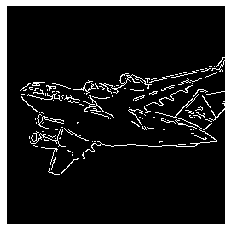

In [95]:
image_gray = cv2.imread("./data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
median_intensity = np.median(image_gray) # 픽셀 강도의 중간값을 계산
# 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정합니다.
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
# 캐니 경계선 감지기를 적용합니다.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
plt.imshow(image_canny, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

In [99]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_bgr = cv2.imread("./data/images/plane_256x256.jpg") # 흑백 이미지 로드
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)
block_size = 2 # 모서리 감지 매개변수를 설정
aperture = 29
free_parameter = 0.04

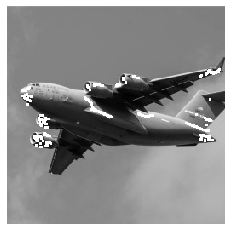

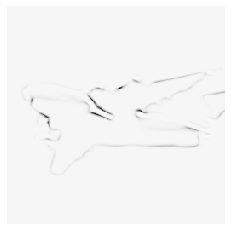

In [103]:
detector_responses = cv2.cornerHarris(image_gray,
                                    block_size,
                                    aperture,
                                    free_parameter) # 모서리를 감지
detector_responses = cv2.dilate(detector_responses, None) # 모서리 표시를 부각시킵니다.
# 임계값보다 큰 감지 결과만 남기고 흰색으로 표시합니다.
threshold = 0.02
image_bgr[detector_responses >threshold *detector_responses.max()] = [255,255,255]
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY) # 흑백으로 변환
plt.imshow(image_gray, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()
# 가능성이 높은 모서리를 출력합니다.
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

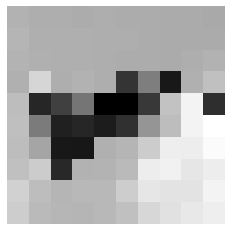

(100,)

In [104]:
image = cv2.imread("./data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_10x10 = cv2.resize(image, (10, 10)) # 이미지를 10x10 픽셀 크기로 변환
image_10x10.flatten() # 이미지 데이터를 1차원 벡터로 변환
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()
image_10x10.shape
image_10x10.flatten().shape

In [105]:
image_10x10.flatten()

array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

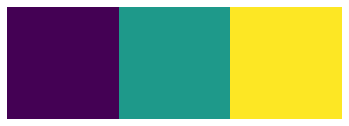

In [111]:
# BGR 이미지로 로드
image_bgr = cv2.imread("./data/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
channels = cv2.mean(image_rgb) # 각 채널의 평균을 계산

# 파랑과 빨강을 바꿉니다(BGR에서 RGB로 만듭니다)
observation = np.array([(channels[0], channels[1], channels[2])])
observation # 채널 평균 값을 확인
plt.imshow(observation), plt.axis("off") # 이미지를 출력
plt.show()

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
digits = datasets.load_digits() # 8X8 크기의 손글씨 숫자 데이터 로드
features = StandardScaler().fit_transform(digits.data) # 특성 행렬을 표준화 처리
# 99%의 분산을 유지하도록 PCA 클래스 객체 생성
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features) # PCA를 수행
print("원본 특성 개수:", features.shape[1]) # 결과를 확인
print("줄어든 특성 개수:", features_pca.shape[1])

/home/ubuntu/anaconda3/envs/cpu_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


원본 특성 개수: 64
줄어든 특성 개수: 54


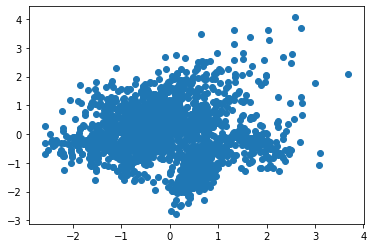

In [114]:
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.show() 

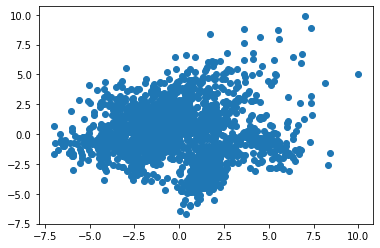

(54, 64)

In [115]:
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:, 0], features_nowhiten[:, 1])
plt.show()
pca_nowhiten.components_.shape

In [116]:
np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.T)) 

True

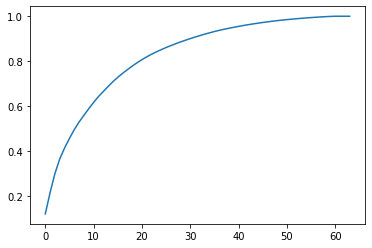

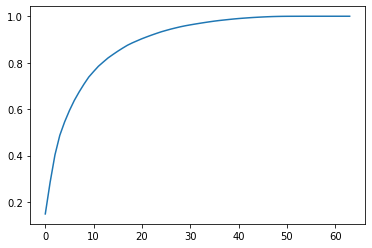

In [121]:
pca = PCA(whiten=True).fit(features)
plt.plot( np.cumsum(pca.explained_variance_ratio_) )
plt.show()
#넘파이 cumsum()를 사용하여 분산을 누적하여 그래프 출력
#대략 30개의 주성분으로도 80% 이상의 분산을 유지
# 표준화하지 않은 원본 데이터를 사용합니다.
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [125]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
# 선형적으로 구분되지 않는 데이터를 만듭니다.
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
# 방사 기저 함수(radius basis function, RBF)를 사용하여 커널 PCA를 적용합니다.
kpca = KernelPCA(kernel="poly", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)
print("원본 특성 개수:", features.shape)
print("줄어든 특성 개수:", features_kpca.shape)

원본 특성 개수: (1000, 2)
줄어든 특성 개수: (1000, 1)


In [126]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = datasets.load_iris() # 붓꽃 데이터셋을 로드
features = iris.data
target = iris.target
# LDA 객체를 만들고 실행하여 특성을 변환합니다.
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)
print("원본 특성 개수:", features.shape[1]) # 특성 개수 출력
print("줄어든 특성 개수:", features_lda.shape[1])
lda.explained_variance_ratio_

원본 특성 개수: 4
줄어든 특성 개수: 1


array([0.9912126])

In [136]:
from sklearn.decomposition import NMF
from sklearn import datasets
digits = datasets.load_digits() # 데이터 로드
features = digits.data # 특성 행렬을 로드
nmf = NMF(n_components=10, random_state=1) # NMF 생성
features_nmf = nmf.fit_transform(features) #학습
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])
nmf.components_.shape #H 행렬
np.all(nmf.components_ >= 0) # 모두 양수인지 확인
# 원본 데이터를 복원하려면 변환된 행렬 W 와 성분 행렬 H를 점곱합니다.
np.mean(features - np.dot(features_nmf, nmf.components_)) # 분산 평균값
## NMF 클래스의 solver 매개변수의 기본값은 cd로 좌표 하강법을 사용합니다
# nmf_mu = NMF(n_components=10, solver='mu', random_state=1)
# features_nmf_mu = nmf_mu.fit_transform(features)
# np.mean(features - np.dot(features_nmf_mu, nmf_mu.components_)) # 분산 평균값

원본 특성 개수: 64
줄어든 특성 개수: 10


-0.2006204374412832

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np
digits = datasets.load_digits() # 데이터 로드
features = StandardScaler().fit_transform(digits.data) # 특성 행렬을 표준화 처리
features_sparse = csr_matrix(features) # 희소 행렬 생성
tsvd = TruncatedSVD(n_components=10) # TSVD 객체 생성
# 희소 행렬에 TSVD를 적용합니다.
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)
print("원본 특성 개수:", features_sparse.shape[1]) # 결과 출력
print("줄어든 특성 개수:", features_sparse_tsvd.shape[1])
# 처음 세 개의 성분이 설명하는 분산의 비율 합
tsvd.explained_variance_ratio_[0:5].sum()

원본 특성 개수: 64
줄어든 특성 개수: 10


0.4139794345546553

In [143]:
print(tsvd)

TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
             random_state=None, tol=0.0)


In [144]:
a = [17, 4, 7, 20, 3, 9, 7, 9, 20, 5]
a.sort(reverse=True)

In [146]:
a.pop(0)

20

In [148]:
t = [1,2,3]
w = [4,5,6]
while len(t) > 0 or len(w) >0:
    w.pop(0)
    t.pop(0)
    print(w,t)


[5, 6] [2, 3]
[6] [3]
[] []


In [152]:
if len(w) == 0:
    print('tes')

tes


In [153]:
a= [[6, 15], [6, 15], [15, 16], [2, 19], [1, 22], [14, 23], [21, 23], [12, 24], [20, 24]]

In [156]:
a = [1,2,3,4,5]
i = 0
while len(a):
    i +=1
    print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449


5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484


7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635


9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9584
9585
9586
9587
9588
9589
9590
9591
9592
9593
9594
9595
9596
9597
9598
9599
9600
9601
9602
9603
9604
9605
9606
9607
9608
9609
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
9620
9621
9622
9623
9624
9625
9626
9627
9628
9629
9630
9631
9632
9633
9634
9635
9636
9637
9638
9639
9640
9641
9642
9643
9644
9645
9646
9647
9648
9649
9650
9651
9652
9653
9654
9655
9656
9657
9658
9659
9660
9661
9662
9663
9664
9665
9666
9667
9668
9669
9670
9671
9672
9673
9674
9675
9676
9677
9678
9679
9680
9681
9682
9683
9684
9685
9686


11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
1166

13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
13669
13670
13671
13672
13673
13674
13675
13676
13677
13678
13679
13680
13681
13682
13683
13684
13685
13686
13687
13688
13689
13690
13691
13692
13693
13694
13695
13696
13697
13698
13699
13700
13701
13702
13703
13704
13705
13706
13707
13708
13709
13710
13711
13712
13713
13714
13715
13716
13717
13718
13719
13720
13721
13722
13723
13724
13725
13726
13727
13728
13729
13730
13731
13732
13733
13734
13735
13736
13737
13738
13739
13740
13741
13742
13743
13744
13745
13746
13747
13748
13749
13750
13751
13752
13753
13754
13755
13756
13757
13758
13759
13760
13761
13762
13763
13764
13765
13766
13767
13768
13769
13770
13771
13772
13773
13774
13775
13776
13777
13778
13779
13780
13781
13782
13783
13784
13785
13786
13787
13788
13789
13790
13791
13792
13793
13794
13795
13796
13797
13798
13799
13800
13801
13802
13803
13804
13805
13806
13807
13808
13809
13810
13811
13812
13813
13814
13815
13816
1381

15357
15358
15359
15360
15361
15362
15363
15364
15365
15366
15367
15368
15369
15370
15371
15372
15373
15374
15375
15376
15377
15378
15379
15380
15381
15382
15383
15384
15385
15386
15387
15388
15389
15390
15391
15392
15393
15394
15395
15396
15397
15398
15399
15400
15401
15402
15403
15404
15405
15406
15407
15408
15409
15410
15411
15412
15413
15414
15415
15416
15417
15418
15419
15420
15421
15422
15423
15424
15425
15426
15427
15428
15429
15430
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15443
15444
15445
15446
15447
15448
15449
15450
15451
15452
15453
15454
15455
15456
15457
15458
15459
15460
15461
15462
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15498
15499
15500
15501
15502
15503
15504
15505
15506
15507
15508
15509
15510
15511
15512
15513
15514
15515
15516
15517
15518
15519
15520
15521
15522
1552

17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
17441
17442
17443
17444
17445
17446
17447
17448
17449
17450
17451
17452
17453
17454
17455
17456
17457
17458
17459
17460
17461
17462
17463
17464
17465
17466
17467
17468
17469
17470
17471
17472
17473
17474
17475
1747

19632
19633
19634
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
1979

21534
21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
21565
21566
21567
21568
21569
21570
21571
21572
21573
21574
21575
21576
21577
21578
21579
21580
21581
21582
21583
21584
21585
21586
21587
21588
21589
21590
21591
21592
21593
21594
21595
21596
21597
21598
21599
21600
21601
21602
21603
21604
21605
21606
21607
21608
21609
21610
21611
21612
21613
21614
21615
21616
21617
21618
21619
21620
21621
21622
21623
21624
21625
21626
21627
21628
21629
21630
21631
21632
21633
21634
21635
21636
21637
21638
21639
21640
21641
21642
21643
21644
21645
21646
21647
21648
21649
21650
21651
21652
21653
21654
21655
21656
21657
21658
21659
21660
21661
21662
21663
21664
21665
21666
21667
21668
21669
21670
21671
21672
21673
21674
21675
21676
21677
21678
21679
21680
21681
21682
21683
21684
21685
21686
21687
21688
21689
21690
21691
21692
21693
21694
21695
21696
21697
21698
21699
2170

23565
23566
23567
23568
23569
23570
23571
23572
23573
23574
23575
23576
23577
23578
23579
23580
23581
23582
23583
23584
23585
23586
23587
23588
23589
23590
23591
23592
23593
23594
23595
23596
23597
23598
23599
23600
23601
23602
23603
23604
23605
23606
23607
23608
23609
23610
23611
23612
23613
23614
23615
23616
23617
23618
23619
23620
23621
23622
23623
23624
23625
23626
23627
23628
23629
23630
23631
23632
23633
23634
23635
23636
23637
23638
23639
23640
23641
23642
23643
23644
23645
23646
23647
23648
23649
23650
23651
23652
23653
23654
23655
23656
23657
23658
23659
23660
23661
23662
23663
23664
23665
23666
23667
23668
23669
23670
23671
23672
23673
23674
23675
23676
23677
23678
23679
23680
23681
23682
23683
23684
23685
23686
23687
23688
23689
23690
23691
23692
23693
23694
23695
23696
23697
23698
23699
23700
23701
23702
23703
23704
23705
23706
23707
23708
23709
23710
23711
23712
23713
23714
23715
23716
23717
23718
23719
23720
23721
23722
23723
23724
23725
23726
23727
23728
23729
23730
2373

25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
25638
25639
25640
25641
25642
25643
25644
25645
25646
25647
25648
25649
25650
25651
25652
25653
25654
25655
25656
25657
25658
25659
25660
25661
25662
25663
25664
25665
25666
25667
25668
25669
25670
25671
25672
25673
25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
2571

27737
27738
27739
27740
27741
27742
27743
27744
27745
27746
27747
27748
27749
27750
27751
27752
27753
27754
27755
27756
27757
27758
27759
27760
27761
27762
27763
27764
27765
27766
27767
27768
27769
27770
27771
27772
27773
27774
27775
27776
27777
27778
27779
27780
27781
27782
27783
27784
27785
27786
27787
27788
27789
27790
27791
27792
27793
27794
27795
27796
27797
27798
27799
27800
27801
27802
27803
27804
27805
27806
27807
27808
27809
27810
27811
27812
27813
27814
27815
27816
27817
27818
27819
27820
27821
27822
27823
27824
27825
27826
27827
27828
27829
27830
27831
27832
27833
27834
27835
27836
27837
27838
27839
27840
27841
27842
27843
27844
27845
27846
27847
27848
27849
27850
27851
27852
27853
27854
27855
27856
27857
27858
27859
27860
27861
27862
27863
27864
27865
27866
27867
27868
27869
27870
27871
27872
27873
27874
27875
27876
27877
27878
27879
27880
27881
27882
27883
27884
27885
27886
27887
27888
27889
27890
27891
27892
27893
27894
27895
27896
27897
27898
27899
27900
27901
27902
2790

29921
29922
29923
29924
29925
29926
29927
29928
29929
29930
29931
29932
29933
29934
29935
29936
29937
29938
29939
29940
29941
29942
29943
29944
29945
29946
29947
29948
29949
29950
29951
29952
29953
29954
29955
29956
29957
29958
29959
29960
29961
29962
29963
29964
29965
29966
29967
29968
29969
29970
29971
29972
29973
29974
29975
29976
29977
29978
29979
29980
29981
29982
29983
29984
29985
29986
29987
29988
29989
29990
29991
29992
29993
29994
29995
29996
29997
29998
29999
30000
30001
30002
30003
30004
30005
30006
30007
30008
30009
30010
30011
30012
30013
30014
30015
30016
30017
30018
30019
30020
30021
30022
30023
30024
30025
30026
30027
30028
30029
30030
30031
30032
30033
30034
30035
30036
30037
30038
30039
30040
30041
30042
30043
30044
30045
30046
30047
30048
30049
30050
30051
30052
30053
30054
30055
30056
30057
30058
30059
30060
30061
30062
30063
30064
30065
30066
30067
30068
30069
30070
30071
30072
30073
30074
30075
30076
30077
30078
30079
30080
30081
30082
30083
30084
30085
30086
3008

KeyboardInterrupt: 